<a href="https://colab.research.google.com/github/Pratichhya/ubs_course/blob/main/MaxTree_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install rasterio
!pip install sap

In [5]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Max-tree and attribute filtering

![](img/max_pruning.png)

## 0. Setup: Load the DSM tile

- Load the dsm tile `tile_path` 

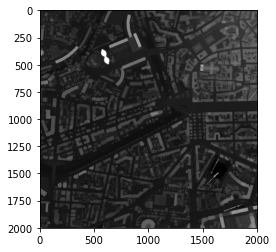

In [6]:
tile_path = Path('../image processing/dsm_vox_50cm_tile_-12_0.tif')
dsm = None # Your turn!
image=(rio.open(tile_path)).read(1)
plt.imshow(image, cmap='gray')
plt.show()

## 1. Create the max-tree of the DSM with the Python package `sap`

- Create the max-tree of `dsm` (tip: don't forget that you can display docstrings with `?<package>`!)
- How many nodes have the max-tree?

In [7]:
# creation of the max-tree of an image
mt = sap.MaxTree(image)
mt

MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (2001, 2001),
 'image_hash': 'f0eb33b2',
 'image_name': None,
 'num_nodes': 6119633}

It has 6119633 nodes.

In [8]:
sap.Tree.available_attributes()

{'area': ['vertex_area=None', 'leaf_graph=None'],
 'child_number': [],
 'children_pair_sum_product': ['node_weights'],
 'compactness': ['area=None',
  'contour_length=None',
  'normalize=True',
  'leaf_graph=None'],
 'contour_length': ['vertex_perimeter=None',
  'edge_length=None',
  'leaf_graph=None'],
 'contour_strength': ['edge_weights',
  'vertex_perimeter=None',
  'edge_length=None',
  'leaf_graph=None'],
 'depth': [],
 'dynamics': ['altitudes', "increasing_altitudes='auto'"],
 'extinction_value': ['altitudes', 'attribute', "increasing_altitudes='auto'"],
 'extrema': ['altitudes'],
 'frontier_length': ['edge_length=None', 'leaf_graph=None'],
 'frontier_strength': ['edge_weights', 'leaf_graph'],
 'gaussian_region_weights_model': ['vertex_weights', 'leaf_graph=None'],
 'height': ['altitudes', "increasing_altitudes='auto'"],
 'lca_map': ['leaf_graph'],
 'mean_vertex_weights': ['vertex_weights', 'area=None', 'leaf_graph=None'],
 'moment_of_inertia': ['leaf_graph'],
 'piecewise_constan

## 2. Compute some attributes on the max-tree

- Get the nodes `area` attribute in a vector.
- Get the nodes `compactness` attributes.
- What is the size of the attribute vectors? Why?

In [10]:
#computing the area attributes of the nodes
area = mt.get_attribute('area')
print("area attribute in vector: ",area)

#computing the compactness attributes of the nodes
compactness = mt.get_attribute('compactness')
print("compactness attribute in vector: ",compactness)

#size of the attribute vector
number_nodes = mt.num_nodes()
print("size of the attribute vector: ",number_nodes)


area attribute in vector:  [1.000000e+00 1.000000e+00 1.000000e+00 ... 4.003860e+06 4.003861e+06
 4.004001e+06]
compactness attribute in vector:  [1.         1.         1.         ... 0.89296008 0.89338216 1.        ]
size of the attribute vector:  6119633


## 3. Filter the DSM with attribute filtering!

We'll filter the DTM with a threshold on the area attributes.

+ Choose an area threshold
+ Get the vector of deleted nodes
+ Filter the tree according to the vector of deleted nodes
+ Display!

In [11]:
#Reconstructor returns the reconstructed image according to deleted nodes with area less than 100 pixels
filtered_image = mt.reconstruct(area >10000)       #here default deleted nodes are 0
filtered_image

array([[29.14522362, 29.12707138, 29.12030602, ..., 50.74575806,
        53.14151001, 52.86373901],
       [29.15999985, 29.14166641, 29.12333298, ..., 48.76499939,
        53.90000153, 53.89113617],
       [30.58499908, 29.96999931, 29.1060009 , ..., 50.56999969,
        54.59500122, 54.25640488],
       ...,
       [43.56499863, 43.5357132 , 43.56000137, ..., 48.31000137,
        48.5233345 , 45.38999939],
       [43.12769318, 43.15545273, 43.16583252, ..., 46.95000076,
        47.23249817, 45.83927155],
       [42.95999908, 42.69428635, 43.        , ..., 46.06000137,
        47.11000061, 46.53666687]])

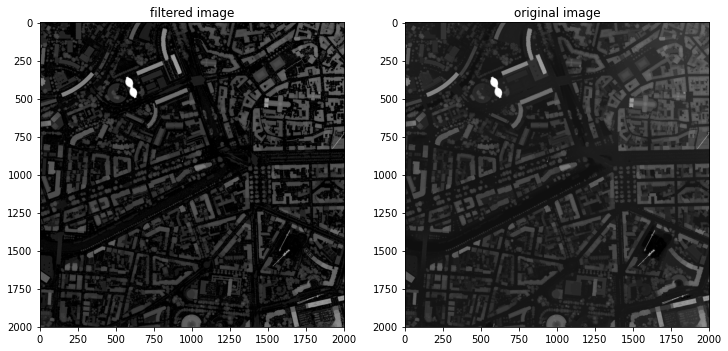

In [12]:
#display
plt.figure(figsize=(12, 10))
plt.subplot(121)
plt.imshow(filtered_image, cmap='gray')
plt.title("filtered image")
plt.subplot(122)
plt.imshow(image, cmap='gray')
plt.title("original image")
plt.show()

In the filtered image based on $area >10000$ we were able to visualize only those pixel in a region with greater than 10000. We can see that several small pixels are removed from the image.